# <font size="10">20회 모의고사</font>

# 1번
날씨 온도 예측, 종속변수 :actual(최고온도)  

데이터 출처 : https://towardsdatascience.com/random-forest-in-python-24d0893d51c0  

데이터 경로 : /kaggle/input/adp-kr-p2/problem1.csv  

temp_1 : 전날 최고온도  

temp_2 : 전전날 최고온도  

friend : 친구의 예측온도  

## 1-1 데이터 확인 및 전처리
데이터 EDA 수행

결측치를 확인하고 처리 방안에 대해 논의하라

데이터 분할 방법 설명

최종 데이터셋이 적절함을 주장하라

<font size="5">*) 참고해보자</font>

데이터 셋에 날짜 컬럼이 있고, 데이터 셋 주제등을 봤을때 시계열 관련데이터라고 생각이 든다면

1. 문제에 시계열로 처리 하라는 내용이 없다면, 굳이 시계열로 안해도 된다는 생각을 머리속에

2. 시계열로 풀려면 데이터가 연속적이여야 하니깐 결측치 처리를 어떻게 할지를 생각..

3. 시계열로 안풀었을 경우는 파생변수 같은거를 잘 생각해 보자..  
   - describe로 했을 경우 min 값이나 max값이 이상 한지 보고
   - 시간의 격차를 보고 판단할수 있는거를 생각해봐
      23회 문제에서는 데이터 직전과 직후를 비교하여 종속값이 변화 하지 않거나, date값이 3분이내이면 이전값으로 하자 등
      20회 태양광 문제에서는 데이터 셋을 보고, 6시~18시까지의 성격에 데이터면 파생변수 생성등

4. 날짜의 diff를 하였을 경우는 차이값을 보여준다. 이부분도 유용하게 사용할듯
target['date'].diff().dt.seconds.dropna()  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('./data/20회/problem1.csv')
data = data [['year','month','day','temp_2','temp_1','actual','friend']]
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   year    348 non-null    int64
 1   month   348 non-null    int64
 2   day     348 non-null    int64
 3   temp_2  348 non-null    int64
 4   temp_1  348 non-null    int64
 5   actual  348 non-null    int64
 6   friend  348 non-null    int64
dtypes: int64(7)
memory usage: 19.2 KB


,year,month,day,temp_2,temp_1,actual,friend
0,2016,1,1,45,45,45,29
1,2016,1,2,44,45,44,61
2,2016,1,3,45,44,41,56
3,2016,1,4,44,41,40,53
4,2016,1,5,41,40,44,41


총 348  건 데이터와 12 columns 으로 구성 되어 있으며, float64(1), int64(10), object(1) 구성 되어 있다.  

In [138]:
data['date'] = pd.to_datetime(data[['year','month','day']])
data = data.set_index('date')

In [139]:
data

,year,month,day,temp_2,temp_1,actual,friend
date,,,,,,,
2016-01-01,2016,1,1,45,45,45,29
2016-01-02,2016,1,2,44,45,44,61
2016-01-03,2016,1,3,45,44,41,56
2016-01-04,2016,1,4,44,41,40,53
2016-01-05,2016,1,5,41,40,44,41
...,...,...,...,...,...,...,...
2016-12-27,2016,12,27,42,42,47,47
2016-12-28,2016,12,28,42,47,48,58
2016-12-29,2016,12,29,47,48,48,65


### 결측치를 확인하고 처리 방안에 대해 논의하라

- 이전 값/ 다음 값을 이용하여 결측값 채우기

- 최근접 이웃 보간 

- 선형 보간법

- 다항식 보간법

In [140]:
data = data.asfreq(freq='D')
data

,year,month,day,temp_2,temp_1,actual,friend
date,,,,,,,
2016-01-01,2016.0,1.0,1.0,45.0,45.0,45.0,29.0
2016-01-02,2016.0,1.0,2.0,44.0,45.0,44.0,61.0
2016-01-03,2016.0,1.0,3.0,45.0,44.0,41.0,56.0
2016-01-04,2016.0,1.0,4.0,44.0,41.0,40.0,53.0
2016-01-05,2016.0,1.0,5.0,41.0,40.0,44.0,41.0
...,...,...,...,...,...,...,...
2016-12-27,2016.0,12.0,27.0,42.0,42.0,47.0,47.0
2016-12-28,2016.0,12.0,28.0,42.0,47.0,48.0,58.0
2016-12-29,2016.0,12.0,29.0,47.0,48.0,48.0,65.0


In [141]:
data[data.isnull().any(axis=1)]

,year,month,day,temp_2,temp_1,actual,friend
date,,,,,,,
2016-02-13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-02-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN


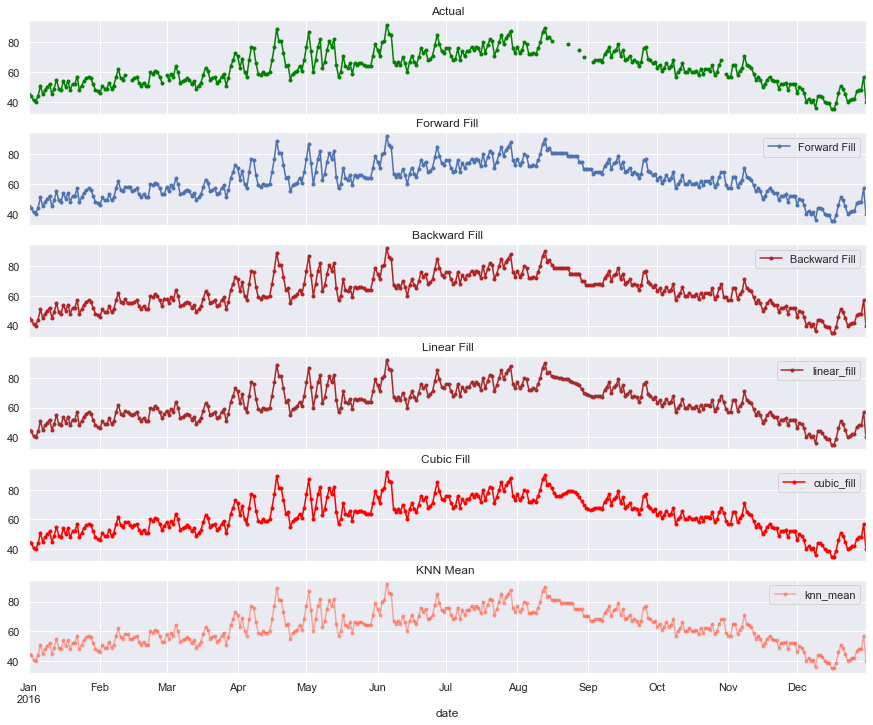

In [142]:
from scipy.interpolate import interp1d

fig, axes = plt.subplots(6, 1, sharex=True, figsize=(15, 12))
plt.rcParams.update({'xtick.bottom' : False})

actual = data[['actual','friend']].copy()

## 1. Actual -------------------------------
actual['actual'].plot(title='Actual', ax=axes[0], label='Actual', color='green', style=".-")

## 2. Forward Fill --------------------------
# bfill 결측값 위에값
df_ffill = actual['actual'].ffill()
df_ffill.plot(title='Forward Fill', ax=axes[1], label='Forward Fill', style=".-")
axes[1].legend(["Forward Fill"])

## 3. Backward Fill -------------------------
# bfill 결측값 아래값
df_bfill = actual['actual'].bfill()
df_bfill.plot(title="Backward Fill",ax=axes[2], label='Back Fill', color='firebrick', style=".-")
axes[2].legend(['Backward Fill'])

# 4. Linear Interpolation ------------------
actual['rownum'] = np.arange(actual.shape[0])
df_nona = actual.dropna(subset = ['actual'])
f = interp1d(df_nona['rownum'], df_nona['actual'])
actual['linear_fill'] = f(actual['rownum'])
actual['linear_fill'].plot(title="Linear Fill", 
                       ax=axes[3], label='Cubic Fill', color='brown', style=".-")
axes[3].legend(['linear_fill'])

## 5. Cubic Interpolation --------------------
#삼차보간법은 3차(cubic) 함수를 활용합니다. 삼차보간법은 우리가 알고 있는 
# 두 점 a, b가 삼차함수 그래프 위에 있다고 가정합니다
f2 = interp1d(df_nona['rownum'], df_nona['actual'], kind='cubic')
actual['cubic_fill'] = f2(actual['rownum'])
actual['cubic_fill'].plot(title="Cubic Fill ", 
                      ax=axes[4], label='Cubic Fill', color='red', style=".-")
axes[4].legend(['cubic_fill'])

f21 = interp1d(df_nona['rownum'], df_nona['friend'], kind='cubic')
actual['friend_cubic'] = f21(actual['rownum'])

## 6. Knn Interpolation --------------------
f3 = interp1d(df_nona['rownum'], df_nona['actual'], kind='nearest')
actual['knn_mean'] = f3(actual['rownum'])
actual['knn_mean'].plot(title="KNN Mean ",
                    ax=axes[5], label='KNN Mean', color='tomato', alpha=0.5, style=".-")
axes[5].legend(['knn_mean'])

f4 = interp1d(df_nona['rownum'], df_nona['friend'], kind='nearest')
actual['friend_knn'] = f4(actual['rownum'])

plt.show()


In [143]:
null_index = data[data.isnull().any(axis =1 )].index
null_index

DatetimeIndex(['2016-02-13', '2016-02-14', '2016-02-29', '2016-08-17',
               '2016-08-18', '2016-08-19', '2016-08-20', '2016-08-21',
               '2016-08-22', '2016-08-24', '2016-08-25', '2016-08-26',
               '2016-08-27', '2016-08-29', '2016-08-31', '2016-09-01',
               '2016-09-02', '2016-10-30'],
              dtype='datetime64[ns]', name='date', freq=None)

In [144]:
actual['ffill'] = data['actual'].ffill()
actual['bfill'] = data['actual'].bfill()

In [145]:
actual.loc[null_index]

,actual,friend,rownum,linear_fill,cubic_fill,friend_cubic,knn_mean,friend_knn,ffill,bfill
date,,,,,,,,,,
2016-02-13,NaN,NaN,43,57.000000,58.237520,34.092374,58.0,33.0,58.0,55.0
2016-02-14,NaN,NaN,44,56.000000,56.372916,43.532054,55.0,53.0,58.0,55.0
2016-02-29,NaN,NaN,59,55.500000,55.755070,68.229705,53.0,66.0,53.0,58.0
2016-08-17,NaN,NaN,229,80.714286,77.690998,104.889549,81.0,90.0,81.0,79.0
2016-08-18,NaN,NaN,230,80.428571,76.000363,111.107003,81.0,90.0,81.0,79.0
2016-08-19,NaN,NaN,231,80.142857,75.561730,110.849138,81.0,90.0,81.0,79.0
2016-08-20,NaN,NaN,232,79.857143,76.008740,106.312729,79.0,89.0,81.0,79.0
2016-08-21,NaN,NaN,233,79.571429,76.975029,99.694552,79.0,89.0,81.0,79.0
2016-08-22,NaN,NaN,234,79.285714,78.094237,93.191384,79.0,89.0,81.0,79.0


In [146]:
# data['actual'].fillna(actual['knn_mean'], inplace=True)
# data['friend'].fillna(actual['friend_knn'], inplace=True)
data['actual'].fillna(actual['cubic_fill'], inplace=True)
data['friend'].fillna(actual['friend_cubic'], inplace=True)

In [147]:
data.loc[null_index]

,year,month,day,temp_2,temp_1,actual,friend
date,,,,,,,
2016-02-13,NaN,NaN,NaN,NaN,NaN,58.237520,34.092374
2016-02-14,NaN,NaN,NaN,NaN,NaN,56.372916,43.532054
2016-02-29,NaN,NaN,NaN,NaN,NaN,55.755070,68.229705
2016-08-17,NaN,NaN,NaN,NaN,NaN,77.690998,104.889549
2016-08-18,NaN,NaN,NaN,NaN,NaN,76.000363,111.107003
2016-08-19,NaN,NaN,NaN,NaN,NaN,75.561730,110.849138
2016-08-20,NaN,NaN,NaN,NaN,NaN,76.008740,106.312729
2016-08-21,NaN,NaN,NaN,NaN,NaN,76.975029,99.694552
2016-08-22,NaN,NaN,NaN,NaN,NaN,78.094237,93.191384


In [148]:
data['temp_2'].fillna(data['actual'].shift(2), inplace=True)
data['temp_1'].fillna(data['actual'].shift(1), inplace=True)

In [149]:
data.loc[null_index]

,year,month,day,temp_2,temp_1,actual,friend
date,,,,,,,
2016-02-13,NaN,NaN,NaN,55.000000,58.000000,58.237520,34.092374
2016-02-14,NaN,NaN,NaN,58.000000,58.237520,56.372916,43.532054
2016-02-29,NaN,NaN,NaN,57.000000,53.000000,55.755070,68.229705
2016-08-17,NaN,NaN,NaN,84.000000,81.000000,77.690998,104.889549
2016-08-18,NaN,NaN,NaN,81.000000,77.690998,76.000363,111.107003
2016-08-19,NaN,NaN,NaN,77.690998,76.000363,75.561730,110.849138
2016-08-20,NaN,NaN,NaN,76.000363,75.561730,76.008740,106.312729
2016-08-21,NaN,NaN,NaN,75.561730,76.008740,76.975029,99.694552
2016-08-22,NaN,NaN,NaN,76.008740,76.975029,78.094237,93.191384


In [150]:
data = data.reset_index()

In [151]:
data['year'].fillna(data['date'].dt.year, inplace=True)
data['month'].fillna(data['date'].dt.month, inplace=True)
data['day'].fillna(data['date'].dt.day, inplace=True)

In [152]:
data = data.drop('date', axis = 1)

In [153]:
data

,year,month,day,temp_2,temp_1,actual,friend
0,2016.0,1.0,1.0,45.0,45.0,45.0,29.0
1,2016.0,1.0,2.0,44.0,45.0,44.0,61.0
2,2016.0,1.0,3.0,45.0,44.0,41.0,56.0
3,2016.0,1.0,4.0,44.0,41.0,40.0,53.0
4,2016.0,1.0,5.0,41.0,40.0,44.0,41.0
...,...,...,...,...,...,...,...
361,2016.0,12.0,27.0,42.0,42.0,47.0,47.0
362,2016.0,12.0,28.0,42.0,47.0,48.0,58.0
363,2016.0,12.0,29.0,47.0,48.0,48.0,65.0
364,2016.0,12.0,30.0,48.0,48.0,57.0,42.0


### 상관분석

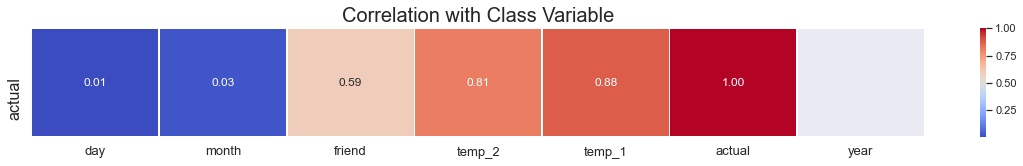

In [154]:
corr1 = data.corr()['actual'].sort_values()

plt.figure(figsize=(20,2))
sns.heatmap(data = pd.DataFrame(corr1).T, annot=True, 
            annot_kws={"size": 12}, 
            fmt = '.2f', linewidths=0.5, cmap='coolwarm') # .T
plt.title('Correlation with Class Variable', fontsize=20)
plt.yticks(rotation=90)
plt.tick_params(axis="x", labelsize=13)
plt.tick_params(axis="y", labelsize=16)
plt.show()

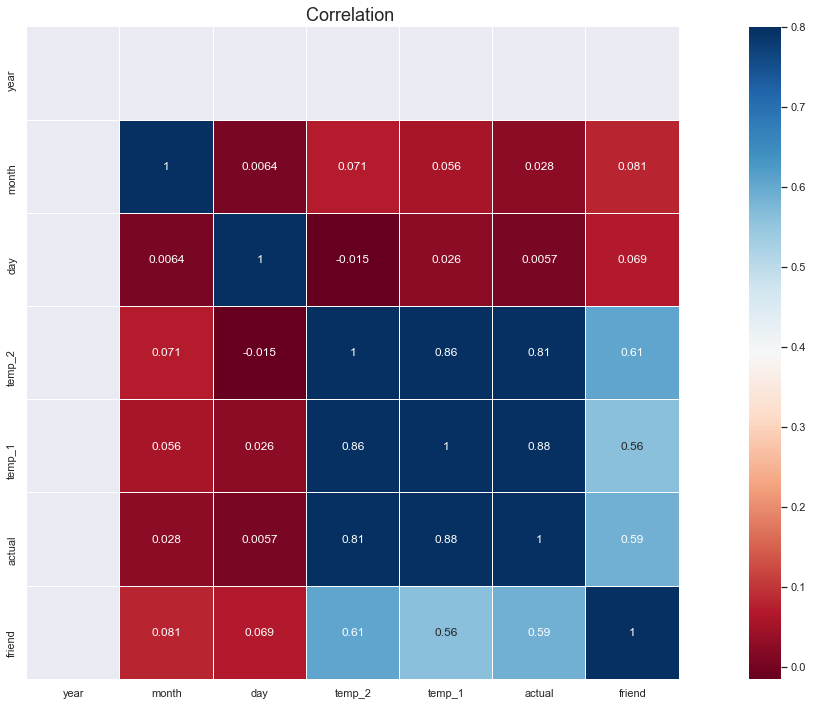

In [155]:
colormap = plt.cm.RdBu
sns.set(font_scale=1.0)

f , ax = plt.subplots(figsize = (25,12))
plt.title('Correlation ',y=1,size=18)
sns.heatmap(data.corr(),square = True, linewidths = 0.1,
            cmap = colormap, linecolor = "white", vmax=0.8,annot=True)# annot 계수 표시
plt.show()

### 데이터 분할

In [156]:
from sklearn.preprocessing import StandardScaler

features = data.drop('actual',axis = 1)
target = data['actual']

stand = StandardScaler()
features = pd.DataFrame(stand.fit_transform(features), columns=features.columns)


split = int(len(data) * 0.8)


X_train = features.iloc[:split,:]
y_train = target.iloc[:split]

X_test = features.iloc[split:,:]
y_test = target.iloc[split:]

In [157]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((292, 6), (74, 6), (292,), (74,))

In [158]:
def plot_cv_indices(cv, X, n_splits, lw=10):
    
    fig, ax = plt.subplots(figsize=(10, 5))
    
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)
    # Formatting
    yticklabels = list(range(n_splits))
    ax.set(yticks=np.arange(n_splits) + .5, yticklabels=yticklabels,
           xlabel='Sample index', ylabel="CV iteration",
           ylim=[n_splits+0.1, -.1], xlim=[0, len(X)])
    ax.set_title('{}'.format(type(cv).__name__), fontsize=15)
    
    ax.legend([Patch(color=cmap_cv(.8)), Patch(color=cmap_cv(.02))],
          ['Testing set', 'Training set'], loc=(1.02, .8))
    return ax

<AxesSubplot:title={'center':'TimeSeriesSplit'}, xlabel='Sample index', ylabel='CV iteration'>

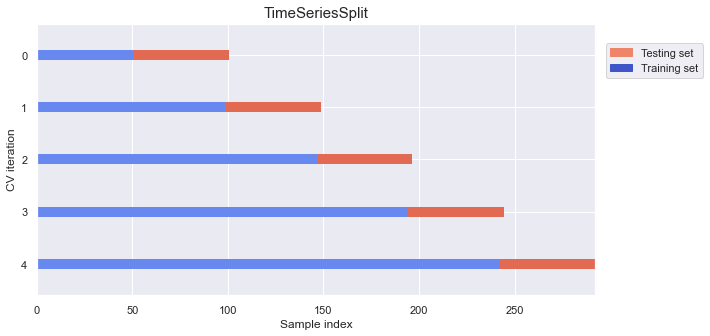

In [159]:
from sklearn.model_selection import TimeSeriesSplit
from matplotlib.patches import Patch
n_splits = 5
np.random.seed(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

folds = TimeSeriesSplit(n_splits=n_splits)

plot_cv_indices(folds, X_train, n_splits)

## 1-2 Random Forest 모델 적합 및 검증
Random Forest 학습 및 예측 결과 해석

예측 결과 검정 해석, 중요변수 도출

변수 중요성 분석 및 그래프 출력

In [160]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
model = RandomForestRegressor(n_estimators=100)

tscv = TimeSeriesSplit(n_splits=5)

rmse = np.sqrt(-cross_val_score(model, X_train, y_train, cv=tscv, 
                                scoring='neg_mean_squared_error'))

R2 = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')

print(f"RMSE: {rmse.mean()} (+/- {rmse.std()}")
print(f"\nR2: {R2.mean()} (+/- {R2.std()}")

RMSE: 6.613890250510972 (+/- 1.1854789902797056

R2: -0.1758344422158435 (+/- 0.27381119021726935


In [161]:
import sklearn.metrics as metrics

def rmse(actual, predict):
    predict = np.array(predict)
    actual = np.array(actual)
    distance = predict - actual
    square_distance = distance ** 2
    mean_square_distance = square_distance.mean()
    score = np.sqrt(mean_square_distance)
    return score

def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))             
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [162]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

'''
make_scorer의 custom_scoring : custom scoring 함수
make_scorer의 greater_is_better : False는 score 값이 낮은게 좋음을 의미
'''
rmse_score = make_scorer(rmse, greater_is_better = False)

model = RandomForestRegressor()

param_search = { 
    'n_estimators': [20, 50, 100],
    'max_features': ['auto', 'sqrt', 'log2'], #무작위로 선택할 Feature의 개수
    'max_depth' : [i for i in range(5,15)]
}

gsearch = GridSearchCV(estimator=model, cv=tscv, 
                       param_grid=param_search, scoring = rmse_score)

gsearch.fit(X_train, y_train)
best_score = gsearch.best_score_
best_model = gsearch.best_estimator_
# checking the best model performance on test data 

y_true = y_test.values
y_pred = best_model.predict(X_test)
regression_results(y_true, y_pred)

explained_variance:  0.4592
mean_squared_log_error:  0.038
r2:  -0.1675
MAE:  7.8156
MSE:  95.1251
RMSE:  9.7532


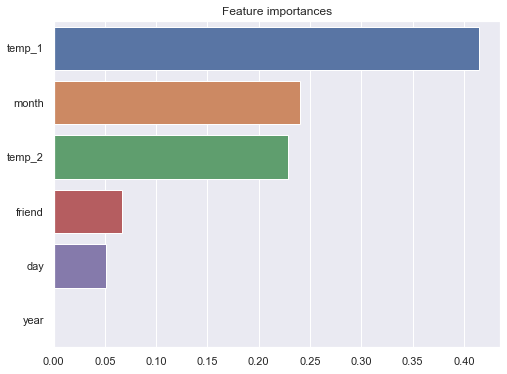

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = best_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_importances = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_importances , y = ftr_importances.index)
plt.show()

## 1-3 SVM(Support Vector Machine) 모델 적합 및 검증
svm 학습 및 예측 결과 해석

예측 결과 검정 해석, 중요변수 도출

변수 중요성 분석 및 그래프 출력

<font size="5">SVM</font>  

<font size="4">SVM은 Feature Scale에 민감하게 영향을 받는 모델 중의 하나입니다. 왜냐하면 결정 경계를 정하는 과정에서 어느 한 특징이 다른 특징보다 훨씬 큰 스케일을 갖게 되면, 그 두 특징 사이에 형성되는 기울기 자체가 무의미해지고 결국 스케일이 작은 특성이 완전히 무시되기 때문입니다.</font>

In [164]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
    {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 
                                 3000., 10000., 30000.0]},
    {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
                        'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
]

svm_reg = SVR()
'''
GridSearchCV(모델명, 하이퍼 파라미터 값(dict), cv=폴드 수, 
            scoring=평가 방법, verbose=진행 상황 표시 
'''
grid_search = GridSearchCV(svm_reg, param_grid, cv=tscv, 
                           scoring=rmse_score, verbose=0)

grid_search.fit(X_train, y_train)

print(grid_search.best_score_)
print(grid_search.best_params_)

best_score = grid_search.best_score_
best_model = grid_search.best_estimator_

y_true = y_test.values
y_pred = best_model.predict(X_test)
regression_results(y_true, y_pred)

-5.730378957329026
{'C': 30000.0, 'kernel': 'linear'}
explained_variance:  0.4503
mean_squared_log_error:  0.0186
r2:  0.2192
MAE:  5.3328
MSE:  63.6179
RMSE:  7.9761


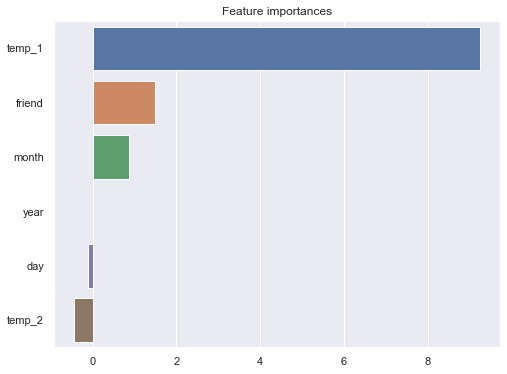

In [165]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = best_model.coef_.ravel()
ftr_importances = pd.Series(ftr_importances_values,index=X_train.columns  )
ftr_importances = ftr_importances.sort_values(ascending=False)

plt.figure(figsize=(8,6))
plt.title('Feature importances')
sns.barplot(x=ftr_importances , y = ftr_importances.index)
plt.show()

## 1-4 모델 비교 및 향후 개선 방향 도출

Random Forest, SVM 모델의 결과 비교 후 최종 모델 선택

두 모델의 장단점 분석, 추후 운영 관점에서 어떤 모델을 선택할 것인가?

모델링 관련 추후 개선 방향 제시

# 2번 5분간격의 가구별 전력 사용량의 데이터

데이터 출처 : 자체생성
    
데이터 경로 : /kaggle/input/adp-kr-p2/problem2.csv

## 2-1 데이터 전처리
각 가구의 15분간격의 전력량의 합을 구하고 해당데이터를 바탕으로 총 5개의 군집으로 군집화를 진행한 후 아래의 그림과 같은 형태로 출력하라.

군집화를 위한 데이터 구성의 이유를 설명하라  
(군집 방식에 따라 Cluster컬럼의 값은 달라질수 있음)

In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('./data/20회/problem2.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401760 entries, 0 to 401759
Data columns (total 3 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   houseCode          401760 non-null  object 
 1   date               401760 non-null  object 
 2   power consumption  401760 non-null  float64
dtypes: float64(1), object(2)
memory usage: 9.2+ MB


,houseCode,date,power consumption
0,house_01,2050-01-14 21:00:00,57.559878
1,house_26,2050-01-02 19:10:00,59.726880
2,house_25,2050-01-13 07:20:00,6.558823
3,house_20,2050-01-26 04:55:00,58.514589
4,house_09,2050-01-18 22:50:00,5.717009


In [293]:
pd.set_option('display.max_rows', 100)

data[data['houseCode']=='house_01'].sort_values('date')

,houseCode,date,power consumption
150941,house_01,2050-01-01 00:00:00,62.006582
124585,house_01,2050-01-01 00:05:00,212.461705
8059,house_01,2050-01-01 00:10:00,85.876966
11920,house_01,2050-01-01 00:15:00,56.902428
325526,house_01,2050-01-01 00:20:00,156.206826
...,...,...,...
86687,house_01,2050-01-31 23:35:00,48.051831
398172,house_01,2050-01-31 23:40:00,229.224845
58299,house_01,2050-01-31 23:45:00,116.502810
4089,house_01,2050-01-31 23:50:00,82.948218


In [294]:
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')

In [295]:
data_15T = data.groupby('houseCode').resample('15T').sum()

In [296]:
data_15T = data_15T.reset_index()

In [297]:
data_15T

,houseCode,date,power consumption
0,house_00,2050-01-01 00:00:00,136.249952
1,house_00,2050-01-01 00:15:00,98.283387
2,house_00,2050-01-01 00:30:00,53.967679
3,house_00,2050-01-01 00:45:00,204.821270
4,house_00,2050-01-01 01:00:00,150.760786
...,...,...,...
133915,house_44,2050-01-31 22:45:00,334.675717
133916,house_44,2050-01-31 23:00:00,463.419892
133917,house_44,2050-01-31 23:15:00,369.930740
133918,house_44,2050-01-31 23:30:00,237.713030


In [298]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
data_15T['houseCode_label'] = label.fit_transform(data_15T['houseCode'])

In [299]:
data_15T

,houseCode,date,power consumption,houseCode_label
0,house_00,2050-01-01 00:00:00,136.249952,0
1,house_00,2050-01-01 00:15:00,98.283387,0
2,house_00,2050-01-01 00:30:00,53.967679,0
3,house_00,2050-01-01 00:45:00,204.821270,0
4,house_00,2050-01-01 01:00:00,150.760786,0
...,...,...,...,...
133915,house_44,2050-01-31 22:45:00,334.675717,44
133916,house_44,2050-01-31 23:00:00,463.419892,44
133917,house_44,2050-01-31 23:15:00,369.930740,44
133918,house_44,2050-01-31 23:30:00,237.713030,44


In [300]:
import time
from datetime import datetime
# pd.options.display.float_format = '{:.5f}'.format

data_15T['datetime'] = data_15T['date'].apply(lambda x : time.mktime(x.timetuple()))
# time.mktime(pd.to_datetime(data['date']).timetuple())

In [301]:
data_15T

,houseCode,date,power consumption,houseCode_label,datetime
0,house_00,2050-01-01 00:00:00,136.249952,0,2.524576e+09
1,house_00,2050-01-01 00:15:00,98.283387,0,2.524576e+09
2,house_00,2050-01-01 00:30:00,53.967679,0,2.524577e+09
3,house_00,2050-01-01 00:45:00,204.821270,0,2.524578e+09
4,house_00,2050-01-01 01:00:00,150.760786,0,2.524579e+09
...,...,...,...,...,...
133915,house_44,2050-01-31 22:45:00,334.675717,44,2.527250e+09
133916,house_44,2050-01-31 23:00:00,463.419892,44,2.527250e+09
133917,house_44,2050-01-31 23:15:00,369.930740,44,2.527251e+09
133918,house_44,2050-01-31 23:30:00,237.713030,44,2.527252e+09


In [304]:
features = data_15T.drop(['houseCode','date'], axis =1 )
features

,power consumption,houseCode_label,datetime
0,136.249952,0,2.524576e+09
1,98.283387,0,2.524576e+09
2,53.967679,0,2.524577e+09
3,204.821270,0,2.524578e+09
4,150.760786,0,2.524579e+09
...,...,...,...
133915,334.675717,44,2.527250e+09
133916,463.419892,44,2.527250e+09
133917,369.930740,44,2.527251e+09
133918,237.713030,44,2.527252e+09


In [305]:
from sklearn.preprocessing import StandardScaler
stand = StandardScaler()
features = pd.DataFrame(stand.fit_transform(features), columns=features.columns)

kmean = KMeans(n_clusters = 5, random_state=0)
cluster_labels = kmean.fit_predict(features)

In [318]:
features.shape

(133920, 3)

In [306]:
data_15T['Cluster'] = cluster_labels

In [307]:
data_15T = data_15T.drop(['houseCode_label','datetime'], axis = 1)

In [308]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data_15T['week'] = data_15T['date'].dt.weekday.apply(lambda x : days[x])

In [309]:
data_15T['hm'] = data_15T['date'].apply(lambda x : x.strftime('%H:%M') )

In [310]:
data_15T

,houseCode,date,power consumption,Cluster,week,hm
0,house_00,2050-01-01 00:00:00,136.249952,2,Saturday,00:00
1,house_00,2050-01-01 00:15:00,98.283387,2,Saturday,00:15
2,house_00,2050-01-01 00:30:00,53.967679,2,Saturday,00:30
3,house_00,2050-01-01 00:45:00,204.821270,2,Saturday,00:45
4,house_00,2050-01-01 01:00:00,150.760786,2,Saturday,01:00
...,...,...,...,...,...,...
133915,house_44,2050-01-31 22:45:00,334.675717,4,Monday,22:45
133916,house_44,2050-01-31 23:00:00,463.419892,3,Monday,23:00
133917,house_44,2050-01-31 23:15:00,369.930740,4,Monday,23:15
133918,house_44,2050-01-31 23:30:00,237.713030,4,Monday,23:30


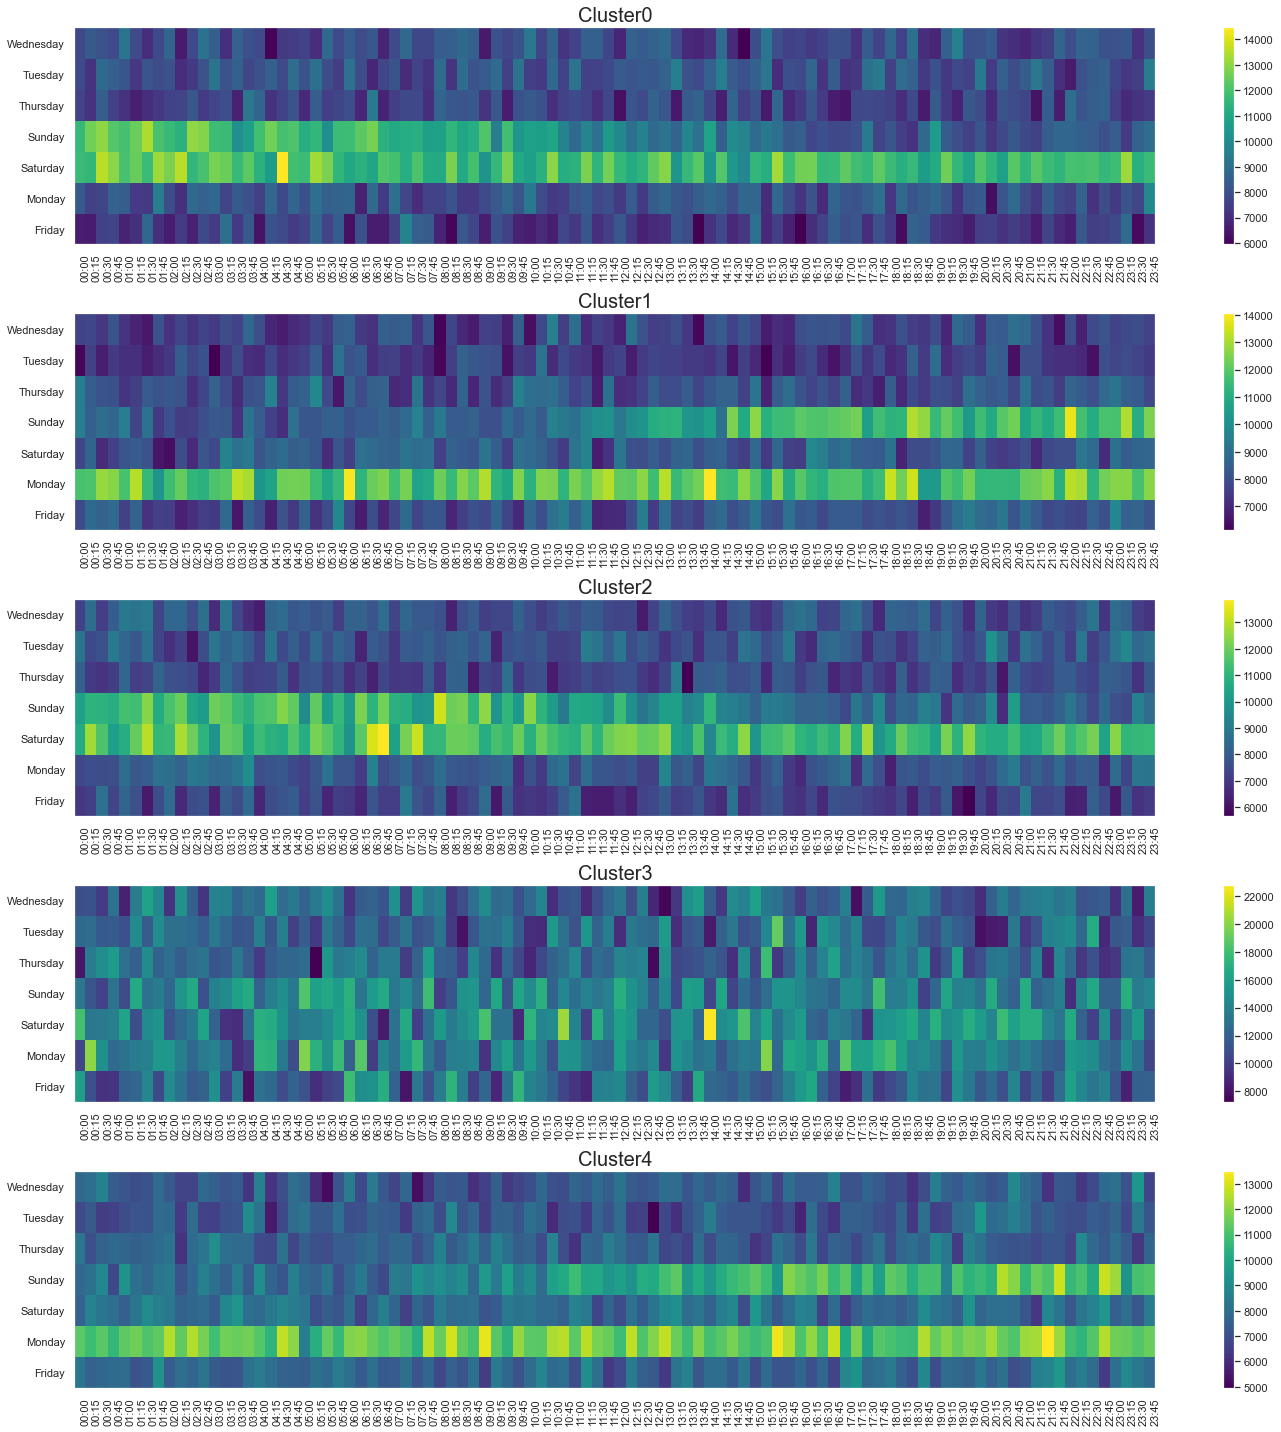

In [320]:
feature_ifr = []
n = 1
plt.figure(figsize=(20,20)) # 먼저 창을 만들고

grouped = data_15T.groupby('Cluster')

for cls,value in grouped:
    piv = pd.pivot_table(value, index = 'week', columns = 'hm',
                     values= 'power consumption', aggfunc='sum', dropna=False).fillna(0)   
        
    ax = plt.subplot(5,1,n)        

    plt.pcolor(piv, cmap="viridis")  
#     cmap="YlGnBu"
    
    # X축의 눈금을 설정할때는 xticks를 활용
    plt.xticks(np.arange(1, len(piv.columns)+1, 1), piv.columns)
    plt.yticks(np.arange(0.5, len(piv.index), 1), piv.index)
    
    plt.title('Cluster{}'. format(cls), fontsize=20)
    
    ax.tick_params(axis='x',                   
                  rotation=90)
    
    plt.colorbar()
    
    n += 1
    
plt.tight_layout()  # 창 크기에 맞게 조정         
plt.show()

# 3번 태양광 데이터

## 3-1 데이터셋 분할 및 결과 검증

데이터셋 7:3 분할

데이터 전처리 및 예측 모델 생성

모델 성능 검증 : RMSE, R제곱, 정확도(아래 방식으로 연산)로 구하여라

정확도의 경우 실제값>예측값인 경우 (1-예측값/실제값), 실제값<예측값인 경우 (1- 실제값/예측값)으로 하고 이것들을 평균낸 후 1에서 뺀값으로 한다.

분수식의 분모가 0인 경우의 정확도는 0.5로 취급한다.

최종 결과 제출 : 소수점 3째자리 반올림

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('./data/20회/problem3.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44904 entries, 0 to 44903
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TIMESTAMP      44904 non-null  object 
 1   BIOGAS         44904 non-null  float64
 2   BIOMASS        44904 non-null  float64
 3   GEOTHERMAL     44904 non-null  float64
 4   Hour           44904 non-null  float64
 5   SMALL HYDRO    44904 non-null  float64
 6   SOLAR          0 non-null      float64
 7   SOLAR PV       44904 non-null  float64
 8   SOLAR THERMAL  44904 non-null  float64
 9   WIND TOTAL     44904 non-null  float64
dtypes: float64(9), object(1)
memory usage: 3.4+ MB


,TIMESTAMP,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,SOLAR,SOLAR PV,SOLAR THERMAL,WIND TOTAL
0,2012-11-26 00:00:00,208.0,354.0,926.0,1.0,208.0,NaN,0.0,0.0,57.0
1,2012-11-26 01:00:00,207.0,354.0,927.0,2.0,207.0,NaN,0.0,0.0,76.0
2,2012-11-26 02:00:00,208.0,353.0,927.0,3.0,208.0,NaN,0.0,0.0,100.0
3,2012-11-26 03:00:00,208.0,350.0,927.0,4.0,209.0,NaN,0.0,0.0,111.0
4,2012-11-26 04:00:00,209.0,352.0,927.0,5.0,209.0,NaN,0.0,0.0,131.0


In [50]:
data = data.drop('SOLAR', axis = 1)

In [51]:
data['TIMESTAMP'] = pd.to_datetime(data['TIMESTAMP'])

In [52]:
data[data['SOLAR PV'] >0]

,TIMESTAMP,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,SOLAR PV,SOLAR THERMAL,WIND TOTAL
6,2012-11-26 06:00:00,207.0,345.0,925.0,7.0,223.0,9.0,0.0,54.0
7,2012-11-26 07:00:00,207.0,345.0,924.0,8.0,230.0,159.0,0.0,16.0
8,2012-11-26 08:00:00,205.0,346.0,922.0,9.0,229.0,427.0,39.0,11.0
9,2012-11-26 09:00:00,207.0,348.0,921.0,10.0,251.0,573.0,130.0,10.0
10,2012-11-26 10:00:00,207.0,351.0,920.0,11.0,252.0,723.0,120.0,16.0
...,...,...,...,...,...,...,...,...,...
44892,2018-01-16 12:00:00,207.0,340.0,961.0,13.0,346.0,4772.0,0.0,1366.0
44893,2018-01-16 13:00:00,205.0,340.0,961.0,14.0,350.0,4819.0,39.0,1061.0
44894,2018-01-16 14:00:00,198.0,339.0,960.0,15.0,349.0,3434.0,72.0,1440.0
44895,2018-01-16 15:00:00,221.0,346.0,961.0,16.0,350.0,1932.0,77.0,1501.0


In [53]:
data.corr()

,BIOGAS,BIOMASS,GEOTHERMAL,Hour,SMALL HYDRO,SOLAR PV,SOLAR THERMAL,WIND TOTAL
BIOGAS,1.000000,0.372263,-0.258647,0.008762,-0.045614,-0.125858,-0.067943,-0.010258
BIOMASS,0.372263,1.000000,-0.323331,0.043796,-0.220611,-0.152875,-0.019454,-0.075096
GEOTHERMAL,-0.258647,-0.323331,1.000000,-0.019259,-0.054165,0.050762,-0.000917,-0.037916
Hour,0.008762,0.043796,-0.019259,1.000000,0.217827,0.058161,0.093214,0.075026
SMALL HYDRO,-0.045614,-0.220611,-0.054165,0.217827,1.000000,0.149551,0.052912,0.202660
SOLAR PV,-0.125858,-0.152875,0.050762,0.058161,0.149551,1.000000,0.793584,-0.105059
SOLAR THERMAL,-0.067943,-0.019454,-0.000917,0.093214,0.052912,0.793584,1.000000,-0.085691
WIND TOTAL,-0.010258,-0.075096,-0.037916,0.075026,0.202660,-0.105059,-0.085691,1.000000


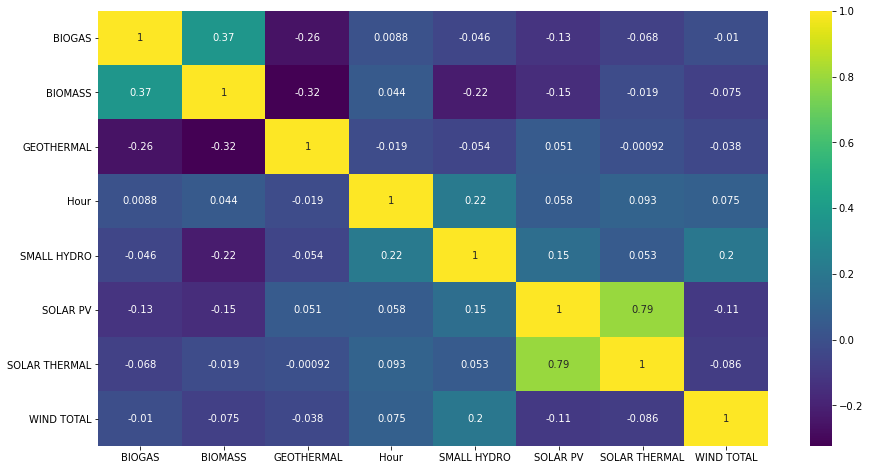

In [59]:
# heatmap by plt.pcolor()
plt.rcParams['figure.figsize'] = [15, 8]
df = data.corr()
sns.heatmap(df,cmap='viridis', annot=True)
plt.show()

In [60]:
def get_suntime(value):
    if value in np.arange(6,18):
        return 1
    else:
        return 0

def get_accuracy(y_test, pred):
    acc = []
    
    for ind, val in enumerate(y_test.values):
        pred_val = pred[ind]       
    
        if val > pred_val :
            acc.append(1-pred_val/val)
        elif val == 0 or pred_val == 0:
            acc.append( 0.5)
        else:
            acc.append(1-val/pred_val)
    
    return np.mean(acc)


In [61]:
data['suntime'] = data['TIMESTAMP'].apply(lambda x : get_suntime(x.hour))

In [67]:
feature = data.drop(['TIMESTAMP','SOLAR PV'], axis = 1)
target = data['SOLAR PV']

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(feature,target, 
                                test_size=0.3, random_state=123)

rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
pred = rfr.predict(X_test)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
acc = get_accuracy(y_test,pred)

print('MSE : {0:.3f} , RMSE : {1:.3F}, ACC :{2:.3F}'. format(mse , rmse, acc)) 
print('r2 score : {0:.3f}'. format(r2_score(y_test, pred)))

MSE : 206470.227 , RMSE : 454.390, ACC :0.337
r2 score : 0.964
